In [3]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\venuv\Downloads\loan_default_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


loan id  customer id  loan amount  loan term  interest rate  annual income  \
0        1          202     25283.18       72.0           5.16       76376.06   
1        2          535     25297.56       36.0           5.13       63090.06   
2        3          960     34382.84       48.0           5.16       80631.46   
3        4          370     19839.55       60.0           3.28      114477.24   
4        5          206     25961.21       60.0           4.59       42579.15   

   credit score employment status        loan purpose loan issue date  \
0           695          employed            business      27-09-2021   
1           669        unemployed    home improvement      24-05-2023   
2           614        unemployed            business      11-05-2024   
3           574        unemployed            business      12-11-2022   
4           576     self-employed  debt consolidation      05-02-2020   

   default status  
0               0  
1               0  
2               0  
3               0  
4               0

In [4]:
# Summary statistics for numerical columns
df.describe()

loan id  customer id   loan amount    loan term  interest rate  \
count  2000.000000  2000.000000   1950.000000  1950.000000    1951.000000   
mean   1000.500000   598.918500  25505.584221    48.043077       4.921599   
std     577.494589   294.301136   9775.047533    16.963976       2.023141   
min       1.000000   100.000000  -5195.120000    24.000000      -2.160000   
25%     500.750000   332.000000  18872.990000    36.000000       3.610000   
50%    1000.500000   603.000000  25341.175000    48.000000       4.900000   
75%    1500.250000   861.000000  31814.722500    60.000000       6.265000   
max    2000.000000  1098.000000  56931.080000    72.000000      11.480000   

       annual income  credit score  default status  
count    1951.000000    2000.00000     2000.000000  
mean    74381.681609     673.49850        0.288500  
std     25694.699270      73.73764        0.453178  
min     -8688.760000     550.00000        0.000000  
25%     56954.760000     608.75000        0.000000  
50%     74619.050000     672.00000        0.000000  
75%     92142.130000     738.00000        1.000000  
max    156909.980000     799.00000        1.000000

In [5]:
# Check for missing values
df.isnull().sum()

loan id               0
customer id           0
loan amount          50
loan term            50
interest rate        49
annual income        49
credit score          0
employment status     0
loan purpose          0
loan issue date       0
default status        0
dtype: int64

In [12]:
import pandas as pd

# Fill missing values in each column
df['loan amount'].fillna(df['loan amount'].median(), inplace=True)
df['loan term'].fillna(df['loan term'].median(), inplace=True)
df['interest rate'].fillna(df['interest rate'].median(), inplace=True)
df['annual income'].fillna(df['annual income'].median(), inplace=True)

# Check if there are any remaining missing values
print(df.isnull().sum())

loan id              0
customer id          0
loan amount          0
loan term            0
interest rate        0
annual income        0
credit score         0
employment status    0
loan purpose         0
loan issue date      0
default status       0
dtype: int64


C:\Users\venuv\AppData\Local\Temp\ipykernel_60184\503877568.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan amount'].fillna(df['loan amount'].median(), inplace=True)
C:\Users\venuv\AppData\Local\Temp\ipykernel_60184\503877568.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [6]:
# Data types of each column
df.dtypes

loan id                int64
customer id            int64
loan amount          float64
loan term            float64
interest rate        float64
annual income        float64
credit score           int64
employment status     object
loan purpose          object
loan issue date       object
default status         int64
dtype: object

In [13]:
# Count unique values in each categorical column
df.select_dtypes(include='object').nunique()

employment status       3
loan purpose            3
loan issue date      1262
dtype: int64

In [15]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                 loan id  customer id  loan amount  loan term  interest rate  \
loan id         1.000000    -0.013062    -0.038724  -0.013553       0.002518   
customer id    -0.013062     1.000000     0.038800  -0.007795       0.003381   
loan amount    -0.038724     0.038800     1.000000  -0.009778       0.037503   
loan term      -0.013553    -0.007795    -0.009778   1.000000       0.014424   
interest rate   0.002518     0.003381     0.037503   0.014424       1.000000   
annual income   0.028817    -0.005105     0.001979   0.006054       0.048866   
credit score    0.024437     0.026124     0.004629  -0.022558      -0.019336   
default status  0.017665    -0.009231     0.039894  -0.019786       0.042069   

                annual income  credit score  default status  
loan id              0.028817      0.024437        0.017665  
customer id         -0.005105      0.026124       -0.009231  
loan amount          0.001979      0.004629        0.039894  
loan term            0.006054  

C:\New folder\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


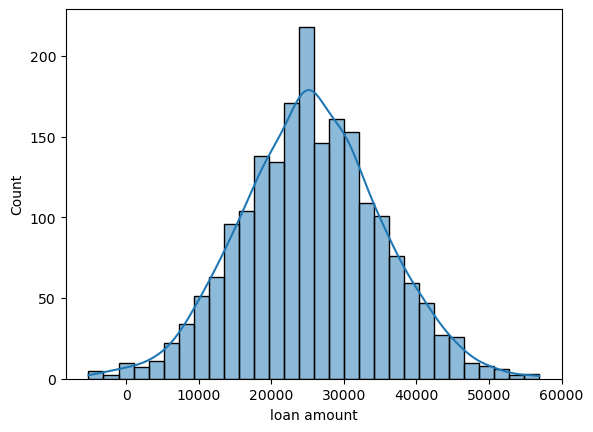

In [23]:
sns.histplot(df['loan amount'], bins=30, kde=True)
plt.show()

In [33]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()['default status'].sort_values(ascending=False)
print(correlation)

default status    1.000000
interest rate     0.042069
loan amount       0.039894
annual income     0.024936
loan id           0.017665
credit score     -0.005923
customer id      -0.009231
loan term        -0.019786
Name: default status, dtype: float64


In [28]:
df['loan purpose'].value_counts()

loan purpose
home improvement      701
business              656
debt consolidation    643
Name: count, dtype: int64

In [29]:
Q1 = df['loan amount'].quantile(0.25)
Q3 = df['loan amount'].quantile(0.75)
IQR = Q3 - Q1

# Outliers in 'loan amount'
outliers = df[(df['loan amount'] < (Q1 - 1.5 * IQR)) | (df['loan amount'] > (Q3 + 1.5 * IQR))]
outliers

loan id  customer id  loan amount  loan term  interest rate  \
263       264          707     -3485.43       60.0           5.89   
303       304          935     -3962.55       24.0           7.64   
435       436          474     50797.09       48.0           4.90   
548       549          191      -539.21       48.0           2.11   
557       558          797      -910.42       60.0           4.22   
655       656          303     51016.83       60.0           5.76   
741       742          174     -3722.62       24.0           5.29   
817       818          208     56931.08       60.0           3.68   
851       852          616     50895.64       48.0           2.99   
952       953          457     -2032.32       72.0           0.06   
1128     1129          951      -302.88       48.0           1.58   
1136     1137          225     51443.43       72.0           3.45   
1159     1160          294     56377.49       24.0           4.46   
1173     1174          928     -4403.89       48.0           6.63   
1226     1227          798     -5195.12       72.0           3.36   
1237     1238          373     52596.60       36.0           7.74   
1320     1321          322      -623.34       72.0           9.35   
1460     1461          715     -1042.14       24.0           5.88   
1507     1508         1047     56099.19       72.0           8.01   
1708     1709          277     54490.94       60.0           8.20   
1723     1724          338     54852.59       36.0           6.39   
1758     1759          480     -1357.48       60.0           6.32   
1776     1777          631     51207.93       48.0           7.16   
1946     1947          922      -295.60       60.0           3.59   

      annual income  credit score employment status        loan purpose  \
263        35409.80           555     self-employed  debt consolidation   
303       118188.80           695          employed    home improvement   
435        80055.65           786     self-employed            business   
548        57346.78           705     self-employed  debt consolidation   
557        72080.90           745        unemployed            business   
655        79873.24           685        unemployed            business   
741       104691.03           765        unemployed    home improvement   
817        80256.16           601     self-employed    home improvement   
851        64833.28           633        unemployed            business   
952        89820.31           672        unemployed  debt consolidation   
1128      127193.65           571     self-employed            business   
1136       78538.30           786          employed  debt consolidation   
1159      101967.98           587     self-employed            business   
1173       66182.88           558     self-employed    home improvement   
1226      102244.68           766          employed    home improvement   
1237       92597.02           627          employed    home improvement   
1320       88291.64           562          employed    home improvement   
1460       68237.13           799        unemployed    home improvement   
1507       16057.70           611     self-employed    home improvement   
1708      101825.52           687          employed            business   
1723       78064.02           658     self-employed  debt consolidation   
1758       72060.04           551          employed    home improvement   
1776       57833.52           773          employed    home improvement   
1946       74619.05           780        unemployed            business   

     loan issue date  default status  
263       09-11-2021               0  
303       16-10-2022               1  
435       07-05-2021               0  
548       02-11-2023               0  
557       10-10-2022               0  
655       04-05-2022               0  
741       17-05-2019               1  
817       14-09-2023               0  
851       04-11-2019               0  
952       05-0

In [34]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
grouped_mean = df.groupby('employment status')[numeric_columns].mean()
print(grouped_mean)

                       loan id  customer id   loan amount  loan term  \
employment status                                                      
employed           1015.805097   592.305847  25784.129745  47.946027   
self-employed       988.449541   626.360856  25328.539901  49.211009   
unemployed          997.072165   578.982327  25390.380479  47.010309   

                   interest rate  annual income  credit score  default status  
employment status                                                              
employed                4.956192   74434.730210    676.097451        0.304348  
self-employed           4.982385   75511.441682    671.484709        0.256881  
unemployed              4.827511   73258.536613    672.885125        0.303387  


In [31]:
pd.pivot_table(df, values='loan amount', index='loan purpose', columns='employment status', aggfunc='mean')

employment status       employed  self-employed    unemployed
loan purpose                                                 
business            25781.549295   25333.295388  25737.370804
debt consolidation  26313.185286   25942.048585  24873.926299
home improvement    25240.821068   24773.270953  25494.661612

In [32]:
from scipy.stats import skew, kurtosis

# Skewness and kurtosis for 'annual income'
skewness = skew(df['annual income'])
kurt = kurtosis(df['annual income'])
print(f"Skewness: {skewness}, Kurtosis: {kurt}")

Skewness: -0.03360462355287419, Kurtosis: -0.05323311637807171


In [35]:
loan_purpose_counts = df['loan purpose'].value_counts()
print(loan_purpose_counts)

loan purpose
home improvement      701
business              656
debt consolidation    643
Name: count, dtype: int64


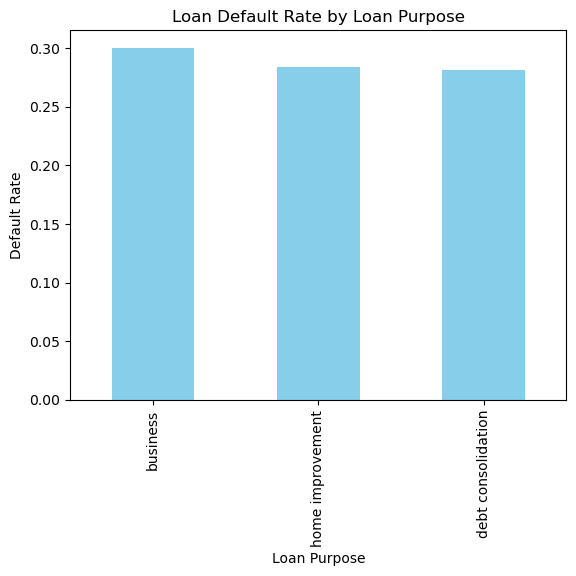

In [37]:
default_rate_by_purpose = df.groupby('loan purpose')['default status'].mean().sort_values(ascending=False)
default_rate_by_purpose.plot(kind='bar', color='skyblue')
plt.title('Loan Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.show()

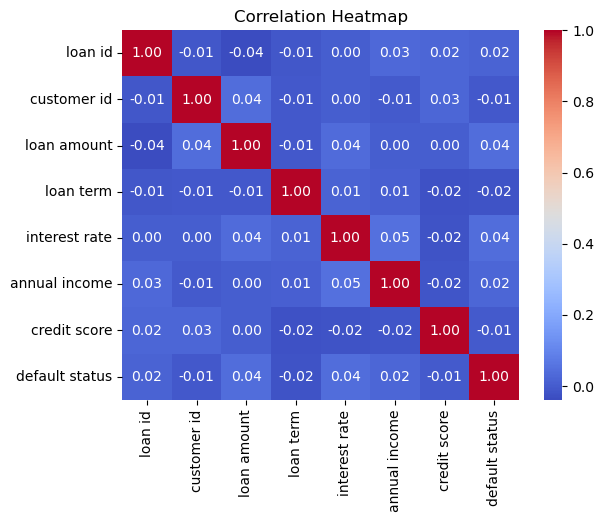

In [46]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

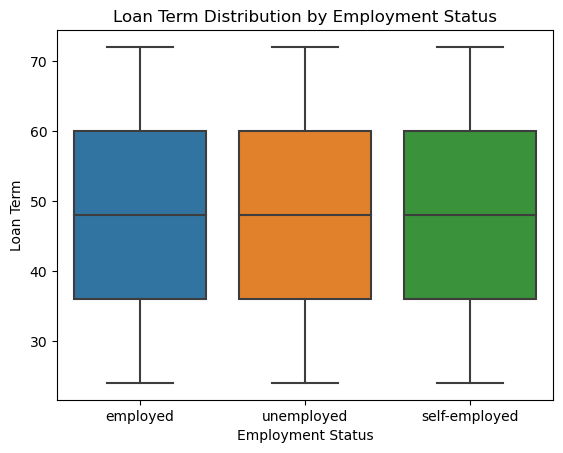

In [40]:
sns.boxplot(x='employment status', y='loan term', data=df)
plt.title('Loan Term Distribution by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Loan Term')
plt.show()

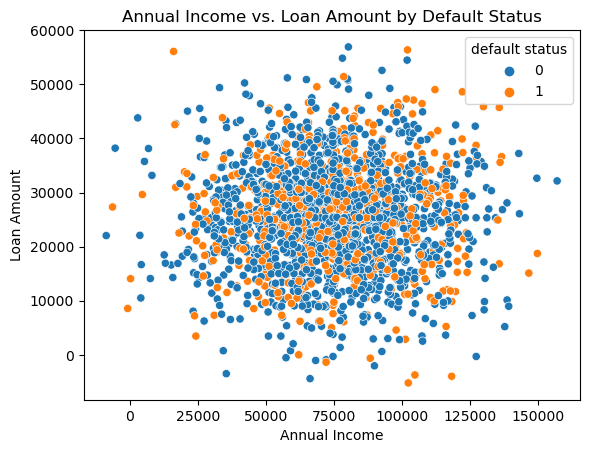

In [41]:
sns.scatterplot(x='annual income', y='loan amount', hue='default status', data=df)
plt.title('Annual Income vs. Loan Amount by Default Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

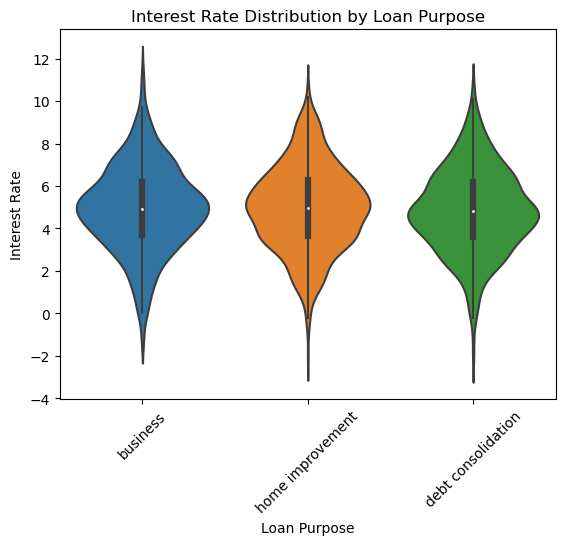

In [42]:
sns.violinplot(x='loan purpose', y='interest rate', data=df)
plt.title('Interest Rate Distribution by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

C:\New folder\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\New folder\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


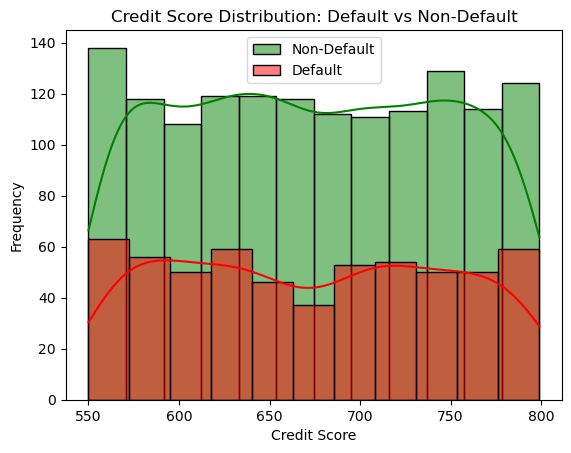

In [43]:
sns.histplot(df[df['default status'] == 0]['credit score'], color='green', label='Non-Default', kde=True)
sns.histplot(df[df['default status'] == 1]['credit score'], color='red', label='Default', kde=True)
plt.title('Credit Score Distribution: Default vs Non-Default')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

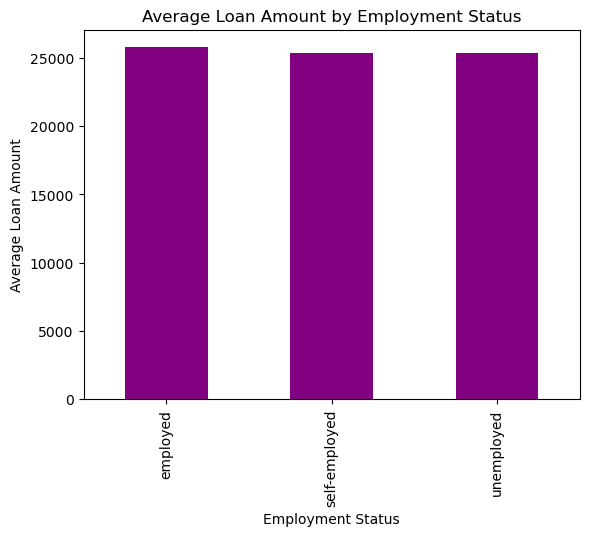

In [44]:
df.groupby('employment status')['loan amount'].mean().plot(kind='bar', color='purple')
plt.title('Average Loan Amount by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Average Loan Amount')
plt.show()

C:\Users\venuv\AppData\Local\Temp\ipykernel_60184\4162788105.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_credit_range = df.groupby('credit score range')['default status'].mean()


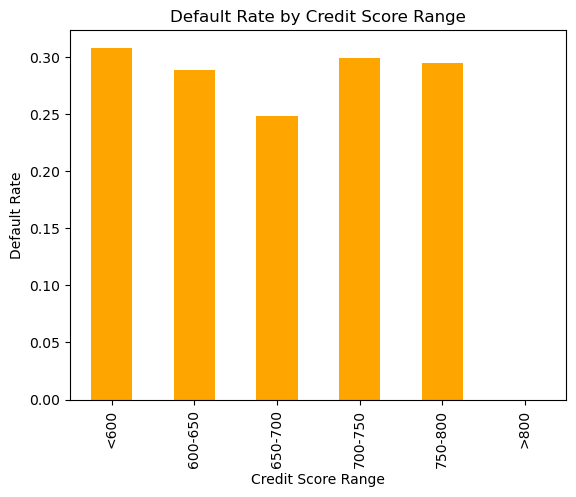

In [45]:
df['credit score range'] = pd.cut(df['credit score'], bins=[0, 600, 650, 700, 750, 800, 850], labels=['<600', '600-650', '650-700', '700-750', '750-800', '>800'])
default_rate_by_credit_range = df.groupby('credit score range')['default status'].mean()
default_rate_by_credit_range.plot(kind='bar', color='orange')
plt.title('Default Rate by Credit Score Range')
plt.xlabel('Credit Score Range')
plt.ylabel('Default Rate')
plt.show()

In [48]:
!pip install openpyxl

In [49]:
# Save DataFrame to Excel file
df.to_excel('cleaned_loan_data.xlsx', index=False)

In [50]:
from IPython.display import FileLink

# Create a link to download the file
FileLink('cleaned_loan_data.xlsx')

C:\Users\venuv\cleaned_loan_data.xlsx